In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import os
import re

import string
from string import digits

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer


np.set_printoptions(threshold=np.nan)
%matplotlib inline

In [2]:
#data dir
data_dir = os.getcwd() + '/data'
trainFeature = data_dir + '/train_data.csv'
trainLabel = data_dir + '/train_label.csv'
test = data_dir + '/test_data.csv'

In [46]:
train_data = pd.read_csv(trainFeature)
train_label = pd.read_csv(trainLabel)

In [4]:
train_data.shape

(41569, 2)

In [5]:
train_label.shape

(75170, 2)

In [6]:
train_data.iloc[0].values

array([ "Keep your gloves, hats, coats and jackets together where you need them with the Entryway Cubbie Shelf. Perfect for any front hallway, mudroom or home office, it's three compartments have room for everything from mittens to schoolbooks. Four large hooks provide sturdy storage for your outerwear, scarves and tote bags. Install it easily with our innovative hanging rail system and get the versatile entryway piece you have been missing.Finished in durable fresh white laminateEasy to install two-piece hanging rail system includedConstructed from CARB-compliant, laminated composite woodsShips ready to assemble, includes an instruction booklet for easy assembly and has a 5-year manufacturer's limited warranty on partsAssembled dimensions: 48 in. W x 16.5 in. H x 11.5 in. DInternal dimensions: 14.25 in. W x 8.75 in. H x 10 in. D (each cubbie)",
       122885], dtype=object)

In [7]:
train_data.head()

,text,id
0,"Keep your gloves, hats, coats and jackets toge...",122885
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065
3,Restore your Porter-Cable sander or polisher t...,165138
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565


In [47]:
train_label.head()

,id,label
0,100003,Shape
1,100004,Voltage (volts)
2,100004,Wattage (watts)
3,100006,Wattage (watts)
4,100007,ENERGY STAR Certified


In [48]:
train_data.set_index('id', inplace=True)

In [49]:
train_label.set_index('id',inplace=True)

## Label Preparation

In [50]:
train_labels = pd.get_dummies(train_label)

In [51]:
train_labels = train_labels.groupby(['id']).agg('sum')

In [52]:
train_labels.head()

,label_Assembly Required,label_Color,label_Commercial / Residential,label_ENERGY STAR Certified,label_Features,label_Finish,label_Flooring Product Type,label_Hardware Included,label_Included,label_Indoor/Outdoor,label_Package Quantity,label_Shape,label_Tools Product Type,label_Voltage (volts),label_Wattage (watts)
id,,,,,,,,,,,,,,,
100003,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
100006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
100008,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


In [53]:
train_labels.columns.values

array(['label_Assembly Required', 'label_Color',
       'label_Commercial / Residential', 'label_ENERGY STAR Certified',
       'label_Features', 'label_Finish', 'label_Flooring Product Type',
       'label_Hardware Included', 'label_Included', 'label_Indoor/Outdoor',
       'label_Package Quantity', 'label_Shape', 'label_Tools Product Type',
       'label_Voltage (volts)', 'label_Wattage (watts)'], dtype=object)

In [159]:
encoded_labels = train_labels.values

In [160]:
encoded_labels.shape

(41569, 15)

In [163]:
encoded_labels[4]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=uint8)

## Text Data Process

In [138]:
train_data.head()

,id,text,count,stem_text,tokenized
0,122885,keep gloves hats coats jackets together need e...,77,keep glove hat coat jacket togeth need entrywa...,"[40577, 39032, 53698, 52071, 38089, 53065, 210..."
1,188958,home dynamix serendipity ivory area rug made h...,100,home dynamix serendip ivori area rug made heat...,"[31241, 36585, 31056, 28884, 5912, 53459, 2210..."
2,146065,bosch volt lithiumion line cordless reciprocal...,107,bosch volt lithiumion line cordless reciproc s...,"[8669, 54825, 39555, 7630, 18592, 23588, 47022..."
3,165138,restore portercable sander polisher original p...,48,restor porterc sander polish origin prowess ad...,"[5451, 27889, 41209, 40745, 5483, 16867, 25902..."
4,185565,surge suppressor tripp lite direct plugin supp...,55,surg suppressor tripp lite direct plugin suppr...,"[41581, 30967, 42206, 42384, 37579, 37261, 309..."


In [143]:
train_data = train_data.sort_values(by=['id'], ascending=True)
train_data.set_index('id',inplace=True)

In [144]:
train_data.head()

,text,count,stem_text,tokenized
id,,,,
100003,classic architecture meets contemporary design...,68,classic architectur meet contemporari design e...,"[23848, 30386, 19977, 32403, 53700, 19101, 399..."
100004,grape solar watt polycrystalline solar panel b...,86,grape solar watt polycrystallin solar panel bo...,"[51608, 15855, 48151, 40806, 15855, 8173, 6921..."
100006,achieving delicious results almost effortless ...,326,achiev delici result almost effortless whirlpo...,"[35653, 22478, 44695, 39441, 38812, 3550, 2286..."
100007,quantum adjustable light black emergency light...,82,quantum adjust light black emerg light unit li...,"[9865, 53623, 31143, 19410, 23370, 31143, 4130..."
100008,teks zincplated steel washerhead hex selftappi...,59,tek zincplat steel washerhead hex selftap dril...,"[10237, 31629, 21151, 53411, 29176, 49981, 856..."


In [12]:
def transpace(text):
    ls = text.split()
    for i in range(len(ls)):
        ls[i] = re.sub(r"(\w)([A-Z])", r"\1 \2", ls[i])
    
    return ' '.join(ls)

def SingleChar(text):
    text = text.split()
    text = [ch for ch in text if len(ch) >= 3]
    return ' '.join(text)

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return ' '.join(new_words)

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return ' '.join(stems)

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return ' '.join(lemmas)

In [17]:
train_data.text = train_data.text.apply(lambda x: transpace(x))

In [18]:
train_data.text = train_data.text.apply(lambda x: x.lower())

In [19]:
train_data.text = train_data.text.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", ' ', x))

In [20]:
exclude = set(string.punctuation)
train_data.text = train_data.text.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [21]:
remove_digits = str.maketrans('', '', digits)
train_data.text = train_data.text.apply(lambda x: x.translate(remove_digits))

In [23]:
train_data.text = train_data.text.apply(lambda x: SingleChar(x))

In [26]:
#normalize
train_data.text = train_data.text.apply(lambda x: remove_stopwords(x.split()))

In [ ]:
# train_data.text = train_data.text.apply(lambda x: stem_words(x.split()))    #uncomment for stemming and saving to Normalize_Text.csv
# train_data.text = train_data.text.apply(lambda x: lemmatize_verbs(x.split()))

In [36]:
train_data.to_csv('Normalize_Text.csv')

## Visualization

In [54]:
def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

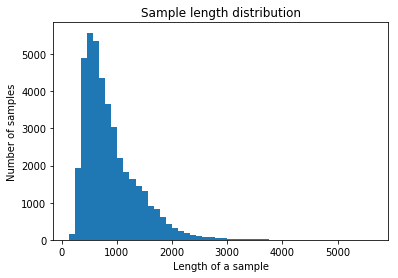

In [56]:
plot_sample_length_distribution(train_data.text)

In [107]:
max(train_data['count'])

542

In [108]:
min(train_data['count'])

15

In [109]:
np.median(train_data['count'])

75.0

In [110]:
np.mean(train_data['count'])

88.649113522095789

## Vocab Definition

In [23]:
train_text = []
words = set()

for sample in train_data.text:
    train_text.append(sample)
    for word in sample.split():
        words.add(word)

In [24]:
len(words)

54898

In [25]:
# feel free to use this import 
from collections import Counter
## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
text_ints = []
for t in train_text:
    text_ints.append([vocab_to_int[word] for word in t.split()])

In [26]:
int_to_vocab = {v: k for k, v in vocab_to_int.items()}

In [153]:
train_data['tokenized'] = text_ints

In [41]:
def pad_features(text_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(text_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(text_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [156]:
seq_length = 200

features = pad_features(text_ints, seq_length=seq_length)

In [13]:
# print(features[:2,:])

In [166]:
split_frac = 0.9

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*0.9)
train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape))

			Feature Shapes:
Train set: 		(37412, 200) 
Validation set: 	(4157, 200)


In [14]:
# train_x[0]

In [15]:
# train_y[0]

In [170]:
np.save('train_x.npy', train_x)
np.save('train_y.npy', train_y)
np.save('val_x.npy', val_x)
np.save('val_y.npy', val_y)

## Test Data Prepare

In [9]:
test_data = pd.read_csv(test)

In [10]:
test_data = test_data.sort_values(by=['id'], ascending=True)
test_data.set_index('id',inplace=True)

In [11]:
test_data.head()

,text
id,
100010,Valley View Industries Metal Stakes (4-Pack) a...
100020,These unique LED multi-color sticks are sure t...
100037,The Husky 9-Pocket Maintenance Pouch has multi...
100039,The Emberglow Vent-Free Gas Stove helps add wa...
100045,The Grayson collection from Thomasville brings...


In [16]:
test_data.text = test_data.text.apply(lambda x: transpace(x))
test_data.text = test_data.text.apply(lambda x: x.lower())
test_data.text = test_data.text.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", ' ', x))
exclude = set(string.punctuation)
test_data.text = test_data.text.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
remove_digits = str.maketrans('', '', digits)
test_data.text = test_data.text.apply(lambda x: x.translate(remove_digits))
test_data.text = test_data.text.apply(lambda x: SingleChar(x))

test_data.text = test_data.text.apply(lambda x: remove_stopwords(x.split()))
test_data['stem_text'] = test_data['text'].apply(lambda x : stem_words(x.split()))

In [28]:
test_text = []

for sample in test_data.text:
    test_text.append(sample)

In [29]:
len(test_text)

10393

In [36]:
test_text_ints = []
for t in test_text:
    sen = []
    for word in t.split():
        if word in vocab_to_int:
            sen.append(vocab_to_int[word])
        else:
            continue
    test_text_ints.append(sen)

In [37]:
len(test_text_ints)

10393

In [38]:
test_data['tokenized'] = test_text_ints

In [42]:
seq_length = 200

test_features = pad_features(test_text_ints, seq_length=seq_length)

In [45]:
np.save('test_x.npy', test_features)